In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_classes_list = [2, 4]
r_list = [0.0, 0.5, 1.0]
n_qubits = 4
var_ansatz_list = ['QCNN_not_shared', "QCNN_shared", "SEL"]


Complexity Measure Numbering

0: num_params/  1: num_params_eff1/  2: num_params_eff10/  3: num_params_eff100 

4: marg_mean/  5: marg_10/  6: marg_Q1/  7: marg_Q2/  8: marg_Q3

9: marg_mean * param/  10: marg_mean * param_eff1/  11: marg_mean * param_eff10/  12: marg_mean * param_eff100

13: marg_10 * param/  14: marg_10 * param_eff1/  15: marg_10 * param_eff10/  16: marg_10 * param_eff100

17: marg_Q1 * param/  18: marg_Q1 * param_eff1/  19: marg_Q1 * param_eff10/  20: marg_Q1 * param_eff100

21: marg_Q2 * param/  22: marg_Q2 * param_eff1/  23: marg_Q2 * param_eff10/  24: marg_Q2 * param_eff100

25: marg_Q3 * param/  26: marg_Q3 * param_eff1/  27: marg_Q3 * param_eff10/  28: marg_Q3 * param_eff100






In [72]:
def get_path(num_classes, r, n_qubits, var_ansatz):
    return f"results/{num_classes}C/{r}R/{n_qubits}Q/{var_ansatz}/"

def plot_MI(num_classes_list, r_list, n_qubits, var_ansatz_list, calc_method, complexity_measure_indcies, complexity_measure_string):
    fig, axs = plt.subplots(len(num_classes_list), len(var_ansatz_list), squeeze=False, figsize=(15, 10))
    plt.rcParams.update({'font.size': 12})
    position = [0, 0.5, 1.0]
    for i, num_classes in enumerate(num_classes_list):
        for j, var_ansatz in enumerate(var_ansatz_list):
            MI_list = np.zeros((len(r_list), len(complexity_measure_indcies)))
            markers = ["^", "v", "o", "x", "+", "D"]
            for k, r in enumerate(r_list):
                path = get_path(num_classes, r, n_qubits, var_ansatz)
                MI = np.load(path + "MI_array.npy")
                MI = MI[:, calc_method]
                MI = MI[complexity_measure_indcies]
                MI_list[k] = MI
            for l in range(len(complexity_measure_indcies)):
                print(MI_list[:,l])
                if complexity_measure_string[l] in ["number of parameters", "number of effective parameters"]:
                    marker = "^"
                else:
                    marker = "o"
                if i == 0 and j == 0:
                    axs[i, j].scatter(position, MI_list[:,l], label=complexity_measure_string[l], marker=markers[l],s=50)
                else:
                    axs[i, j].scatter(position, MI_list[:,l], marker=markers[l],s=50)
                
            #axs[i, j].set_xlabel("random corruption rate")
            #axs[i, j].set_ylabel("Mutual Information")
            axs[i, j].set_xticks(position, ["r=0.0", "r=0.5", "r=1.0"])
            axs[i, j].grid(True)
            axs[i, j].set_xlim(-0.2, 1.2)
    axs[0, 0].set_ylabel("Mutual Information")
    axs[1, 0].set_ylabel("Mutual Information")
    fig.legend(bbox_to_anchor=(0.97, 0.47))
    plt.savefig("MI.pdf")
    
            
#MI_array is 29 * 4

[0.02873313 0.07046081 0.06684517]
[1.48775581e-08 1.50823334e-08 1.57183488e-08]
[0.3607322  0.25073499 0.24192899]
[0.29508267 0.20631849 0.18493393]
[0.28699334 0.24101617 0.24018895]
[0.23338394 0.21561932 0.19616522]
[0.02860324 0.04814669 0.0502449 ]
[1.51997549e-08 1.52847231e-08 1.57112324e-08]
[0.26928016 0.23688584 0.23537179]
[0.26656983 0.18741691 0.17244078]
[0.22799828 0.22414976 0.22907911]
[0.2138948  0.19903118 0.18954891]
[0.04908491 0.05612497 0.05898135]
[1.49015441e-08 1.59124127e-08 1.52633252e-08]
[0.28934602 0.25572577 0.25169893]
[0.28053189 0.19573904 0.17278587]
[0.28121677 0.25540003 0.24181722]
[0.23593023 0.21291466 0.19990114]
[0.02611819 0.03654059 0.05244058]
[1.52105904e-08 1.49773661e-08 1.58611661e-08]
[0.18593723 0.17131545 0.11481138]
[0.13483112 0.11435161 0.06046209]
[0.1728989  0.14976909 0.0901077 ]
[0.13973437 0.13994146 0.10468169]
[0.02343737 0.03266451 0.04194804]
[1.50683066e-08 1.50608154e-08 1.69573222e-08]
[0.16683895 0.15160857 0.09351

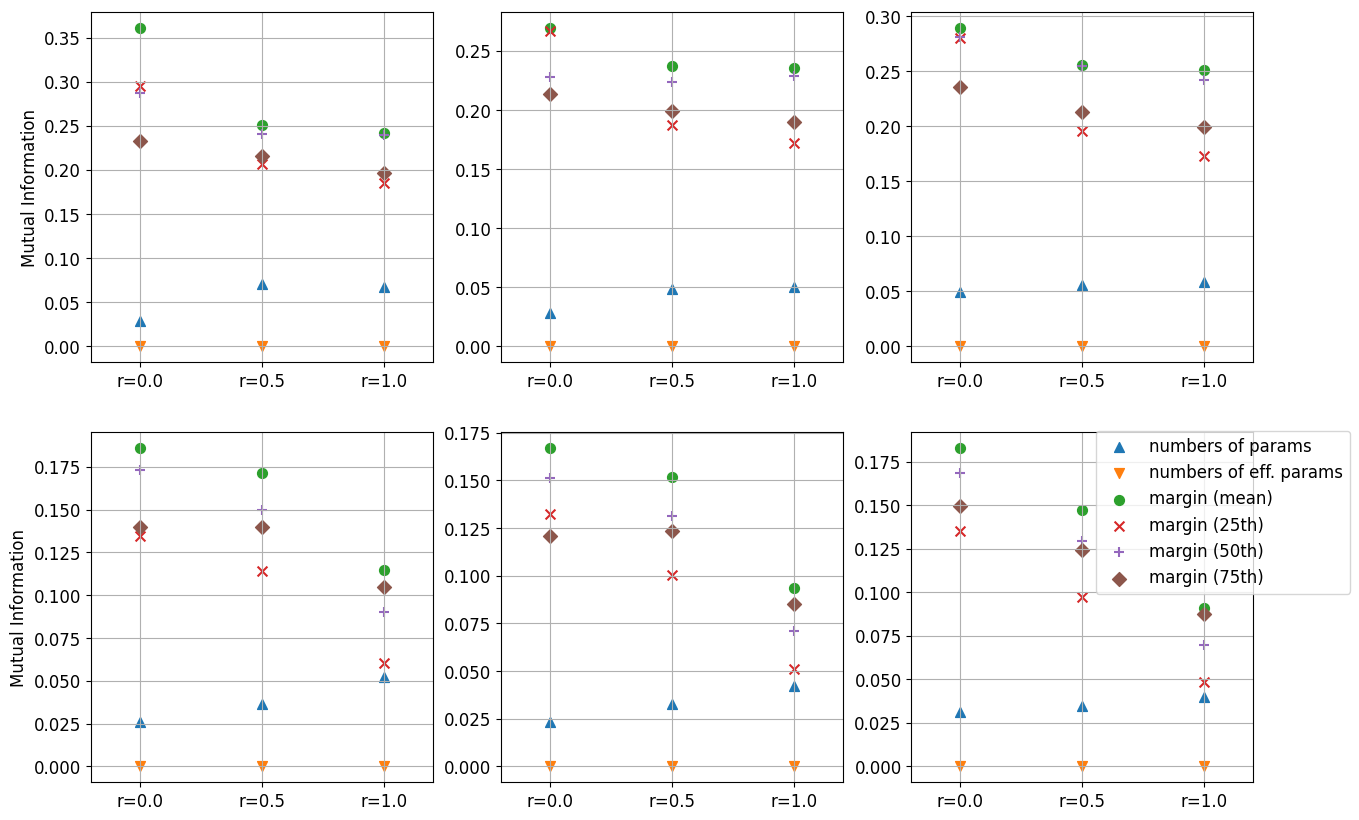

In [73]:
calc_method = 0
complexity_measure_indices = np.array([0, 1, 4, 6, 7, 8])
complexity_measure_string = ["numbers of params", "numbers of eff. params", "margin (mean)", "margin (25th)", "margin (50th)", "margin (75th)"]
plot_MI(num_classes_list, r_list, n_qubits, var_ansatz_list, calc_method, complexity_measure_indices, complexity_measure_string)